In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas import Series
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Source
For our clustering model we decided to take the daily top 200 most streamed songs on spotify. The dataset contain the daily top 200 songs of each day from January 2017 until February 2021

In [2]:
df = pd.read_csv("./data/top-200-daily.csv")

In [3]:
df.tail()

,Unnamed: 0,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
299995,300195,196.0,I Don't Care (with Justin Bieber),Ed Sheeran,"673,962",02/08/2021,global,0hVXuCcriWRGvwMV1r5Yn9,0.798,0.676,6.0,-5.041,1.0,0.0442,0.09020,0.000000,0.0894,0.843,101.956
299996,300196,197.0,Toosie Slide,Drake,"670,495",02/08/2021,global,466cKvZn1j45IpxDdYZqdA,0.830,0.490,1.0,-8.820,0.0,0.2090,0.28900,0.000003,0.1130,0.845,81.604
299997,300197,198.0,Intentions (feat. Quavo),Justin Bieber,"669,513",02/08/2021,global,4umIPjkehX1r7uhmGvXiSV,0.806,0.546,9.0,-6.637,1.0,0.0575,0.30000,0.000000,0.1020,0.874,147.986
299998,300198,199.0,Riptide,Vance Joy,"666,750",02/08/2021,global,7yq4Qj7cqayVTp3FF9CWbm,0.484,0.731,1.0,-6.694,1.0,0.0379,0.43100,0.000000,0.1510,0.510,101.654
299999,300199,200.0,505,Arctic Monkeys,"666,171",02/08/2021,global,58ge6dfP91o9oXMzq3XkIS,0.520,0.852,0.0,-5.866,1.0,0.0543,0.00237,0.000058,0.0733,0.234,140.267


#### Removing unnecessary column

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.0,Starboy,The Weeknd,3.13562e+06,01/01/2017,global,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7.0,-7.028,1.0,0.2820,0.16500,0.000003,0.1340,0.535,186.054
1,2.0,Closer,The Chainsmokers,3.01552e+06,01/01/2017,global,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8.0,-5.599,1.0,0.0338,0.41400,0.000000,0.1110,0.661,95.010
2,3.0,Let Me Love You,DJ Snake,2.54538e+06,01/01/2017,global,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8.0,-5.309,1.0,0.0576,0.07840,0.000010,0.1220,0.142,199.864
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2.3566e+06,01/01/2017,global,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9.0,-4.068,0.0,0.0523,0.40600,0.000000,0.1800,0.742,101.965
4,5.0,One Dance,Drake,2.25989e+06,01/01/2017,global,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1.0,-5.886,1.0,0.0532,0.00784,0.004230,0.3510,0.371,103.989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,196.0,I Don't Care (with Justin Bieber),Ed Sheeran,"673,962",02/08/2021,global,0hVXuCcriWRGvwMV1r5Yn9,0.798,0.676,6.0,-5.041,1.0,0.0442,0.09020,0.000000,0.0894,0.843,101.956
299996,197.0,Toosie Slide,Drake,"670,495",02/08/2021,global,466cKvZn1j45IpxDdYZqdA,0.830,0.490,1.0,-8.820,0.0,0.2090,0.28900,0.000003,0.1130,0.845,81.604
299997,198.0,Intentions (feat. Quavo),Justin Bieber,"669,513",02/08/2021,global,4umIPjkehX1r7uhmGvXiSV,0.806,0.546,9.0,-6.637,1.0,0.0575,0.30000,0.000000,0.1020,0.874,147.986
299998,199.0,Riptide,Vance Joy,"666,750",02/08/2021,global,7yq4Qj7cqayVTp3FF9CWbm,0.484,0.731,1.0,-6.694,1.0,0.0379,0.43100,0.000000,0.1510,0.510,101.654


### We noticed that some dates are missing and filled with blanks. We will remove nulls, reset the indexes and create a backup copy of the data

In [5]:
df.dropna(subset=['spotify_id'],inplace=True)#800 rows
df.reset_index(drop=True)
originalDf = df.copy()

### Because our data set is based on a daily list, many songs appear nomerous of times. For the clustring model we only need one representation of each song in the data frame. We will remove duplicates based on Spotify ID

In [6]:
df = df.drop_duplicates(subset=['spotify_id'])

### Checking if we can convert all dates to datetime format

In [7]:
count = 0
for time in df["date"]:
    try:
        pd.to_datetime(time, format='%m/%d/%Y')
    except ValueError:
        print("Incorrect data format ", time)
        count = count + 1

In [8]:
count

0

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['date']

0        2017-01-01
1        2017-01-01
2        2017-01-01
3        2017-01-01
4        2017-01-01
            ...    
299332   2021-02-05
299358   2021-02-05
299858   2021-02-08
299864   2021-02-08
299951   2021-02-08
Name: date, Length: 6284, dtype: datetime64[ns]

### Our final project is based on the assumption that successful songs have similarities in their features. We decided that we want to extract the truly successful songs. We wanted to add another feature that will help us measure the song success rate. We built a function that checks how many times a song reached the top 50 spots.

In [10]:
def Top50Times(uniqueDf,originalDf):
    Top50TimeArr = []
    originalDf = originalDf.loc[originalDf["Position"] <= 50]
    for _, row in uniqueDf.iterrows():
        spotifyID = row['spotify_id']
        tempDf = originalDf.loc[originalDf["spotify_id"] == spotifyID]
        index = tempDf.index
        numberOfAppearences = len(index)
        Top50TimeArr.append(numberOfAppearences)
    return Top50TimeArr

In [11]:
Top50TimeArr = Top50Times(df,originalDf)

In [12]:
Top50TimeArr

[100,
 126,
 64,
 155,
 62,
 86,
 61,
 60,
 51,
 144,
 97,
 144,
 123,
 80,
 60,
 60,
 57,
 135,
 25,
 26,
 33,
 76,
 53,
 47,
 65,
 37,
 14,
 41,
 44,
 60,
 16,
 8,
 26,
 5,
 3,
 33,
 5,
 4,
 31,
 26,
 3,
 4,
 46,
 11,
 44,
 1,
 7,
 53,
 60,
 60,
 68,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 94,
 0,
 0,
 0,
 0,
 0,
 0,
 18,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 119,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 62,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 0,
 0,
 0,
 0,
 74,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 71,
 0,
 0,
 0,
 122,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 9,
 0,
 0,
 0,
 0,
 79,
 189,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 72,
 56,
 29,
 0,
 0,
 0,
 0,
 510,
 1

In [13]:
df["Top_50_Appearnces"] = Top50TimeArr

In [14]:
df

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Top_50_Appearnces
0,1.0,Starboy,The Weeknd,3.13562e+06,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165000,0.000003,0.1340,0.5350,186.054,100
1,2.0,Closer,The Chainsmokers,3.01552e+06,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,126
2,3.0,Let Me Love You,DJ Snake,2.54538e+06,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8.0,-5.309,1.0,0.0576,0.078400,0.000010,0.1220,0.1420,199.864,64
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2.3566e+06,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9.0,-4.068,0.0,0.0523,0.406000,0.000000,0.1800,0.7420,101.965,155
4,5.0,One Dance,Drake,2.25989e+06,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1.0,-5.886,1.0,0.0532,0.007840,0.004230,0.3510,0.3710,103.989,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299332,133.0,Making A Fire,Foo Fighters,"920,439",2021-02-05,global,2u8NmvhYX6wiviyxJTOhEi,0.506,0.946,9.0,-4.173,1.0,0.0652,0.000022,0.002260,0.0528,0.6510,91.111,0
299358,159.0,What Other People Say,Sam Fischer,"837,565",2021-02-05,global,2h9TDNEXRhcDIV3fsoEVq9,0.652,0.472,7.0,-8.084,1.0,0.0399,0.158000,0.000000,0.1210,0.2400,126.904,0
299858,59.0,Can't Feel My Face,The Weeknd,"1,166,720",2021-02-08,global,22VdIZQfgXJea34mQxlt81,0.705,0.769,9.0,-5.526,0.0,0.0425,0.113000,0.000000,0.1050,0.5830,107.949,0
299864,65.0,Earned It (Fifty Shades Of Grey),The Weeknd,"1,106,935",2021-02-08,global,4frLb7nWtsz2ymBE6k2GRP,0.659,0.291,2.0,-8.275,0.0,0.0348,0.405000,0.000000,0.0771,0.4060,119.829,0


### Finding outliers

We wanted to find outliers in our data using box plot graph.

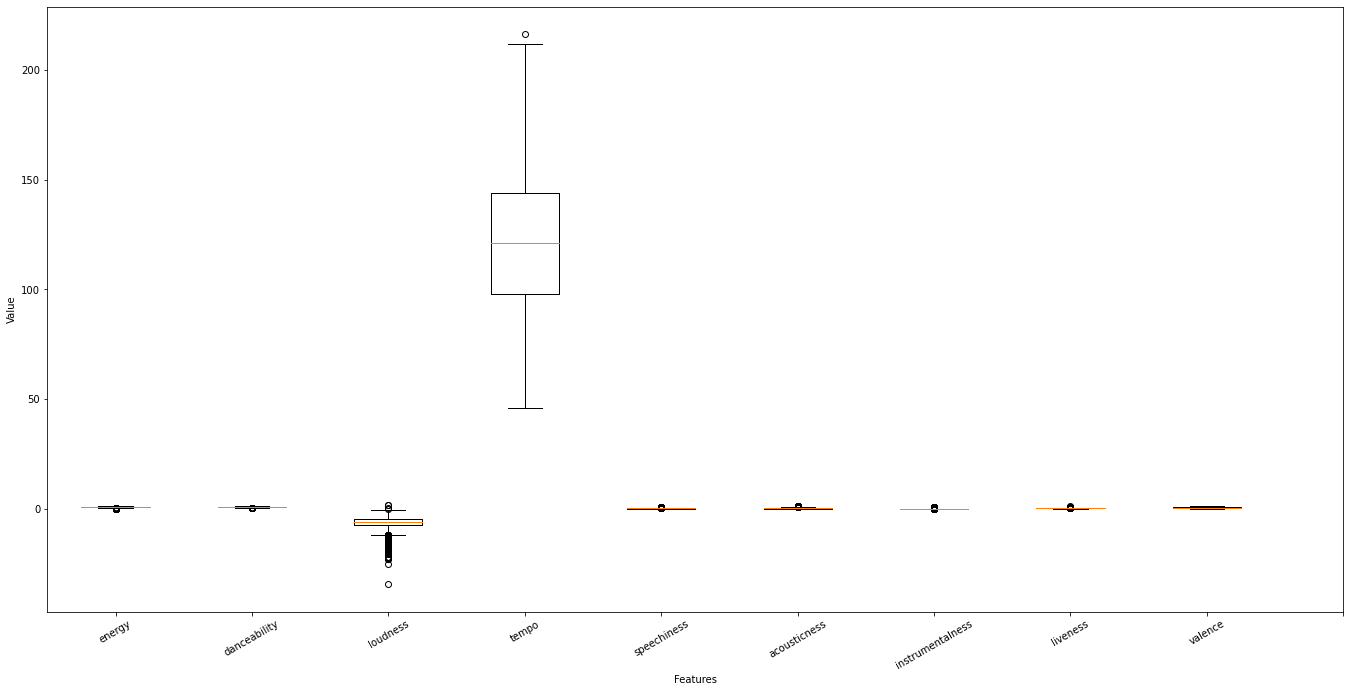

In [15]:
display_data=[df['energy'],df['danceability'],df['loudness'],df['tempo'], \
              df['speechiness'],df['acousticness'],df['instrumentalness'],df['liveness'], \
              df['valence']]
relevantCol = ['energy','danceability','loudness','tempo','speechiness',\
               'acousticness','instrumentalness','liveness','valence']
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(left=0.3, right=1.5,
                    top=0.94, bottom=0.1)
plt.boxplot(display_data)
plt.xticks(range(1,11),relevantCol,rotation=30)
plt.xlabel('Features')
plt.ylabel('Value')
plt.show()

### Outliers definition

In our data we marked songs as outliers if these songs have more than one features that is marked as an outlier.

In [16]:
df.reset_index(drop=True)
all_outliers = np.array([],dtype='int64')
for feature in relevantCol:
    Q1 = np.percentile(df[feature],25)
    Q3 = np.percentile(df[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts = df[ ~((df[feature]>=Q1-step) & (df[feature]<=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values.astype('int64'))

all_outliers2,indices = np.unique(all_outliers,return_inverse=True)

#### Number of songs with one feature marked as an outlier

In [17]:
len(all_outliers)

2751

In [18]:
counts = np.bincount(indices)

In [19]:
outliers = all_outliers2[counts>1]

#### Number of songs with more than one feature marked as an outlier

In [20]:
len(outliers)

396

#### We found out that we have 396 outliers in our data, we will filter them out

In [21]:
indexes_to_keep = set(range(df.shape[0])) - set(outliers)
filtered_data = df.take(list(indexes_to_keep))
filtered_data.reset_index(drop=True)

,Position,Track Name,Artist,Streams,date,region,spotify_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Top_50_Appearnces
0,1.0,Starboy,The Weeknd,3.13562e+06,2017-01-01,global,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7.0,-7.028,1.0,0.2820,0.165000,0.000003,0.1340,0.5350,186.054,100
1,2.0,Closer,The Chainsmokers,3.01552e+06,2017-01-01,global,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8.0,-5.599,1.0,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,126
2,3.0,Let Me Love You,DJ Snake,2.54538e+06,2017-01-01,global,4pdPtRcBmOSQDlJ3Fk945m,0.476,0.718,8.0,-5.309,1.0,0.0576,0.078400,0.000010,0.1220,0.1420,199.864,64
3,4.0,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2.3566e+06,2017-01-01,global,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9.0,-4.068,0.0,0.0523,0.406000,0.000000,0.1800,0.7420,101.965,155
4,5.0,One Dance,Drake,2.25989e+06,2017-01-01,global,1xznGGDReH1oQq0xzbwXa3,0.791,0.619,1.0,-5.886,1.0,0.0532,0.007840,0.004230,0.3510,0.3710,103.989,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6260,133.0,Making A Fire,Foo Fighters,"920,439",2021-02-05,global,2u8NmvhYX6wiviyxJTOhEi,0.506,0.946,9.0,-4.173,1.0,0.0652,0.000022,0.002260,0.0528,0.6510,91.111,0
6261,159.0,What Other People Say,Sam Fischer,"837,565",2021-02-05,global,2h9TDNEXRhcDIV3fsoEVq9,0.652,0.472,7.0,-8.084,1.0,0.0399,0.158000,0.000000,0.1210,0.2400,126.904,0
6262,59.0,Can't Feel My Face,The Weeknd,"1,166,720",2021-02-08,global,22VdIZQfgXJea34mQxlt81,0.705,0.769,9.0,-5.526,0.0,0.0425,0.113000,0.000000,0.1050,0.5830,107.949,0
6263,65.0,Earned It (Fifty Shades Of Grey),The Weeknd,"1,106,935",2021-02-08,global,4frLb7nWtsz2ymBE6k2GRP,0.659,0.291,2.0,-8.275,0.0,0.0348,0.405000,0.000000,0.0771,0.4060,119.829,0


### Save the data to an Excel sheet

In [22]:
filtered_data.to_csv("./data/DF_Daily_Clustering.csv", index=False)